# Using SVM do regression

### wiki [link](https://en.wikipedia.org/wiki/Support_vector_machine#Regression)

1996年，Vladimir N. Vapnik、Harris Drucker、Christopher J. C. Burges、Linda Kaufman和Alexander J. Smola提出了一个用于回归的SVM版本。这种方法被称为支持向量回归(SVR)。由支持向量分类(如上所述)产生的模型只依赖于训练数据的一个子集，因为构建模型的代价函数并不关心超出边际的训练点。类似地，SVR生成的模型只依赖于训练数据的一个子集，因为构建模型的代价函数忽略了任何接近模型预测的训练数据。Suykens和Vandewalle提出了另一种SVM版本，即最小二乘支持向量机(LS-SVM)。

训练原对外情报局意味着解决问题

minimize ${\displaystyle {\frac {1}{2}}\|w\|^{2}}$

subject to ${\displaystyle {\begin{cases}y_{i}-\langle w,x_{i}\rangle -b\leq \varepsilon \\\langle w,x_{i}\rangle +b-y_{i}\leq \varepsilon \end{cases}}} $
其中xi为目标值yi的训练样本。内积加上截距(w,xi)+b是对该样本的预测，ε是一个作为阈值的自由参数:所有预测都必须在真实预测的ε范围内。松弛变量通常被添加到上面，以允许误差和允许近似情况下，上述问题是不可行的。

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Svr_epsilons_demo.svg">

$\varepsilon$越大，允许的误差范围就越大

- http://www.robots.ox.ac.uk/~az/lectures/ml/
- http://www.svms.org/regression/SmSc98.pdf
- http://svms.org/tutorials/Gunn1998.pdf
- https://cn.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

### Example1 - Using linear and non-linear kernels
- http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

Automatically created module for IPython interactive environment


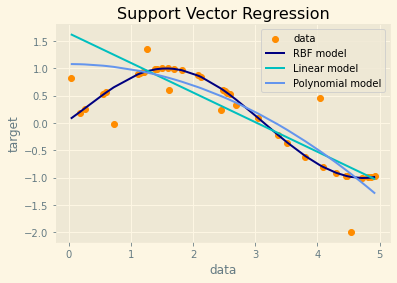

In [16]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[0])

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.01)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
# plt.savefig('example_SVR_1.png', dpi=200)
plt.show()

In [2]:
y

array([-1.24547181,  0.14842253,  0.40290047,  0.71701111,  0.73431519,
        1.08614228,  0.87384356,  0.92411208,  0.93299961,  0.98070501,
        0.21122572,  0.96514512,  0.87587866,  0.87118018,  0.86816463,
        1.45018769,  0.72185433,  0.5595907 ,  0.52319056,  0.47397699,
        0.54576773,  0.29785046,  0.17307835,  0.04337439,  0.01023034,
       -0.92255923, -0.13905665, -0.43828506, -0.53132289, -0.56789587,
       -1.57065677, -0.65601638, -0.71268362, -0.79610315, -0.84611793,
       -0.12933278, -0.97966896, -0.99269479, -0.99030377, -0.97351405])

### Example2 - linear SVM Regression
- https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb

In [85]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()  # 将多维数组降为一维
type(y), y.shape, type(X), X.shape, X[:3], y[:3]

(numpy.ndarray,
 (50,),
 numpy.ndarray,
 (50, 1),
 array([[0.74908024],
        [1.90142861],
        [1.46398788]]),
 array([6.98570729, 9.87565412, 8.27631537]))

In [86]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

线性SVR的超参数，$\epsilon$

The soft  loss setting corresponds for a linear SVR
软间隔损失设置对应线性SVR
![alt text](The-soft-margin-loss-setting-for-a-linear-SVM.png "svm")

In [93]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)  # 返回误差绝对值大于epsilon的点的index

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
eps_y_pred

array([6.52640746])

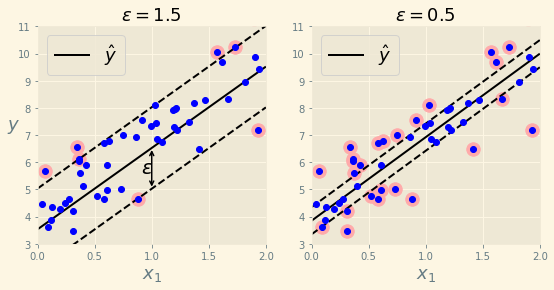

In [94]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")  # 预测的回归线
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")  # 回归线向上平移epsilon
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")  # 回归线向下平移epsilon
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))  # width, height in inches
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])  # 后面是坐标轴的范围
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)  # 可以设置旋转角度
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()

### Example3 - Nonlinear SVM Regression
- C越大, 对违反模型的样本点的惩罚越大, 正则化的效果越弱, 模型越复杂（更趋向于过拟合）, 相当于SVM中的hard margin
- C越小, 对违反模型的样本点的惩罚越小, 正则化的效果越强, 模型越简单（更趋向于欠拟合）, 相当于SVM中非常大的soft margin

In [79]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

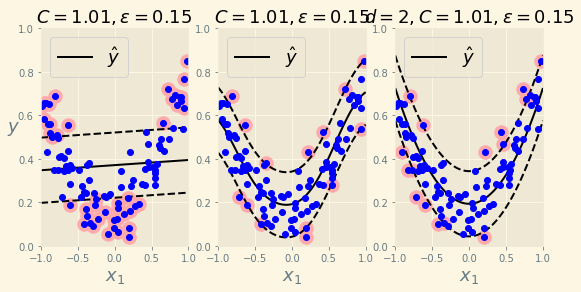

In [80]:
from sklearn.svm import SVR

svm_reg1 = SVR(kernel="linear", degree=5, C=1.01, epsilon=0.15)
svm_reg2 = SVR(kernel="rbf", C=1.01, epsilon=0.15)
svm_reg3 = SVR(kernel="poly", degree=2, C=1.01, epsilon=0.15)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)
svm_reg3.fit(X, y)



plt.figure(figsize=(9, 4))
plt.subplot(131)
plot_svm_regression(svm_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$C={}, \epsilon = {}$".format(svm_reg1.C, svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(132)
plot_svm_regression(svm_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$C={}, \epsilon = {}$".format(svm_reg2.C, svm_reg2.epsilon), fontsize=18)
plt.subplot(133)
plot_svm_regression(svm_reg3, X, y, [-1, 1, 0, 1])
plt.title(r"$d={}, C={}, \epsilon = {}$".format(svm_reg3.degree, svm_reg3.C, svm_reg3.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
plt.show()